# a. Import Libraries

In [873]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler, LabelEncoder

# b. Read and Preprocessing data

In [874]:
df = pd.read_csv('data_C.csv')
df

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41253,41253,55217,15641043,Onyemere,641.0,Germany,Male,38.0,2,138166.30,2,0,1,69227.66,0
41254,41254,110969,15674541,Robinson,575.0,France,Male,52.0,8,0.00,2,0,1,111342.66,0
41255,41255,132494,15700601,Kao,571.0,France,Male,34.0,1,119452.03,2,1,1,173511.72,0
41256,41256,31177,15806926,Nkemjika,624.0,France,Male,38.0,4,0.00,1,0,0,40320.30,0


In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


Dapat kita lihat bahwa:
- Terdapat kolom unnamed yang tidak berisi informasi yang relevan untuk analisis kita, maka kita akan hapus kolom tersebut
- Terdapat kolom id, customer id, dan Surname yang merupakan variabel yang tidak relevan untuk analisis kita

In [876]:
df.describe()

,Unnamed: 0,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41258.00000,41258.000000,4.125800e+04,41246.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000
mean,20628.50000,82629.935091,1.569218e+07,655.802890,38.165611,5.036308,55308.965471,1.556038,0.754011,0.496776,112507.486040,0.214455
std,11910.30304,47642.122777,7.136319e+04,79.736298,8.947665,2.817831,62795.530950,0.548029,0.430677,0.499996,50048.666663,0.410449
min,0.00000,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.25000,41377.500000,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,20628.50000,82802.500000,1.569070e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117616.290000,0.000000
75%,30942.75000,123737.250000,1.575662e+07,710.000000,42.750000,7.000000,119785.395000,2.000000,1.000000,1.000000,154700.647500,0.000000
max,41257.00000,165032.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [877]:
df.isna().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

Dapat kita lihat ada 12 missing values di CreditScore. Kita dapat impute menggunakan mean ataupun median, karena nilai keduanya memiliki jarak yang dekat (mean 655 dan median 659)

In [878]:
df['CreditScore'].mean()

655.8028899772099

In [879]:
df['CreditScore'] = df['CreditScore'].fillna(value=df['CreditScore'].mean())

In [880]:
df.duplicated().sum()

0

Drop 4 kolom yang tidak berisi informasi yang berhubungan dengan analisis kita

In [881]:
df = df.drop(columns=['Unnamed: 0','CustomerId','id','Surname'])

In [882]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0
...,...,...,...,...,...,...,...,...,...,...,...
41253,641.0,Germany,Male,38.0,2,138166.30,2,0,1,69227.66,0
41254,575.0,France,Male,52.0,8,0.00,2,0,1,111342.66,0
41255,571.0,France,Male,34.0,1,119452.03,2,1,1,173511.72,0
41256,624.0,France,Male,38.0,4,0.00,1,0,0,40320.30,0


In [883]:
# Print all columns value counts 
for i in df.columns:
    print(df[i].value_counts())
    print()

CreditScore
850.0    594
678.0    561
684.0    459
667.0    408
683.0    395
        ... 
417.0      1
441.0      1
363.0      1
442.0      1
427.0      1
Name: count, Length: 445, dtype: int64

Geography
France     23469
Spain       9057
Germany     8732
Name: count, dtype: int64

Gender
Male      23219
Female    18039
Name: count, dtype: int64

Age
37.00    2351
38.00    2317
35.00    2241
34.00    2148
36.00    2135
         ... 
83.00       1
84.00       1
85.00       1
36.44       1
81.00       1
Name: count, Length: 71, dtype: int64

Tenure
7     4516
2     4469
8     4424
5     4297
4     4253
9     4240
1     4177
3     4114
6     3960
10    1491
0     1317
Name: count, dtype: int64

Balance
0.00         22471
124577.33       26
129855.32       20
122314.50       18
127864.40       16
             ...  
103421.80        1
142996.63        1
124197.26        1
125879.29        1
105405.97        1
Name: count, Length: 11410, dtype: int64

NumOfProducts
2    21080
1    19305
3   

In [884]:
df['Balance'].value_counts()

Balance
0.00         22471
124577.33       26
129855.32       20
122314.50       18
127864.40       16
             ...  
103421.80        1
142996.63        1
124197.26        1
125879.29        1
105405.97        1
Name: count, Length: 11410, dtype: int64

Dapat kita lihat bahwa ada banyak nilai 0 pada Balance sampai berjumlah 22471

# c. Exploratory Data Analysis (Simple version)

In [885]:
numeric_columns = ['CreditScore','Age','Balance','EstimatedSalary']
categorical_columns = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','churn']

## Univariate Analysis for Categorical

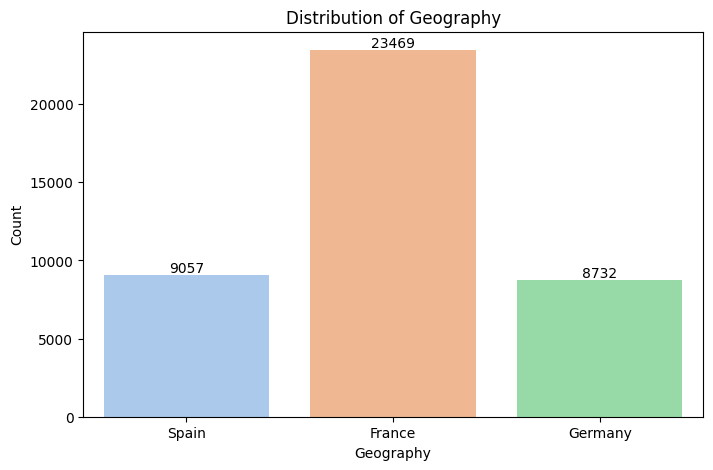

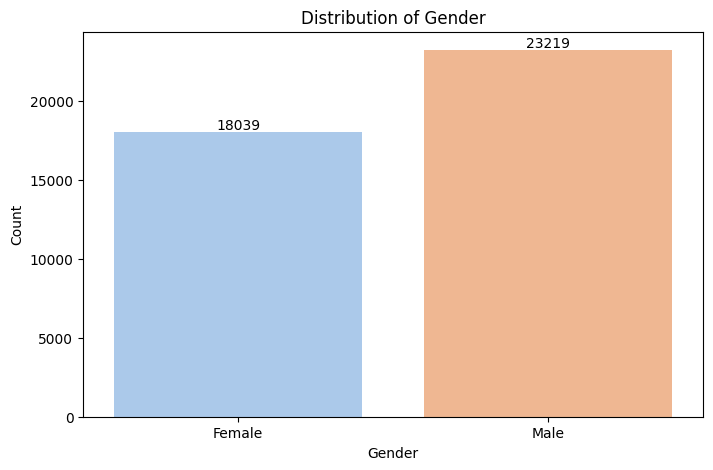

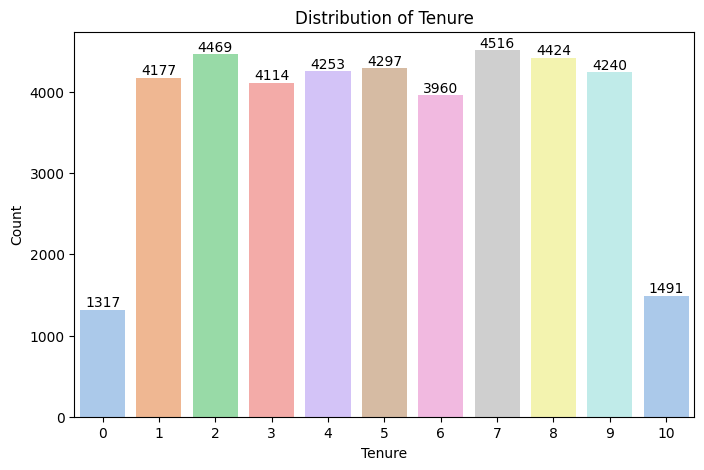

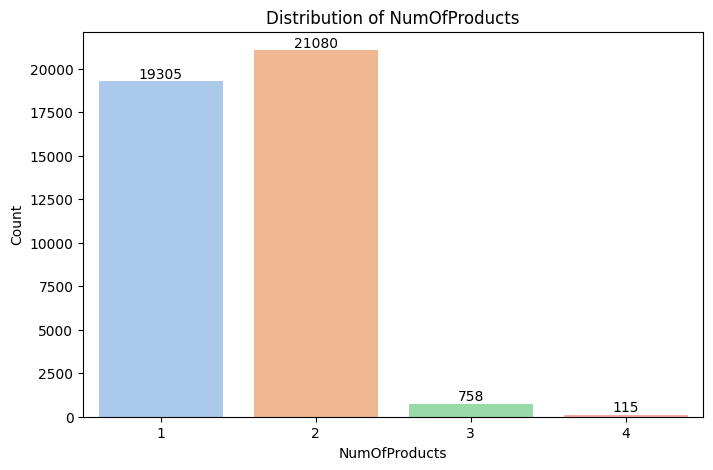

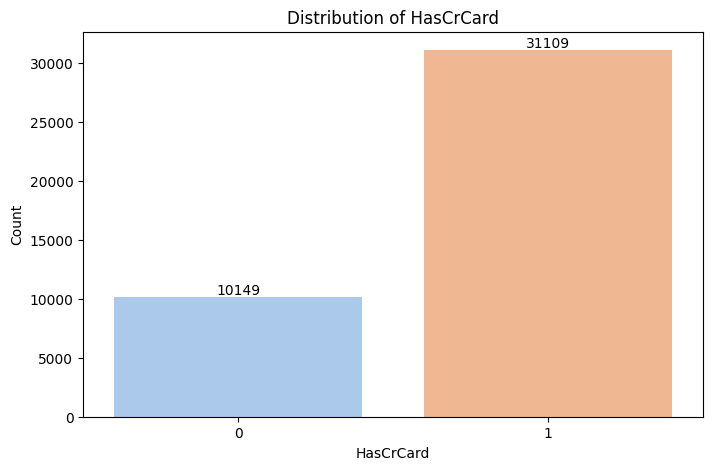

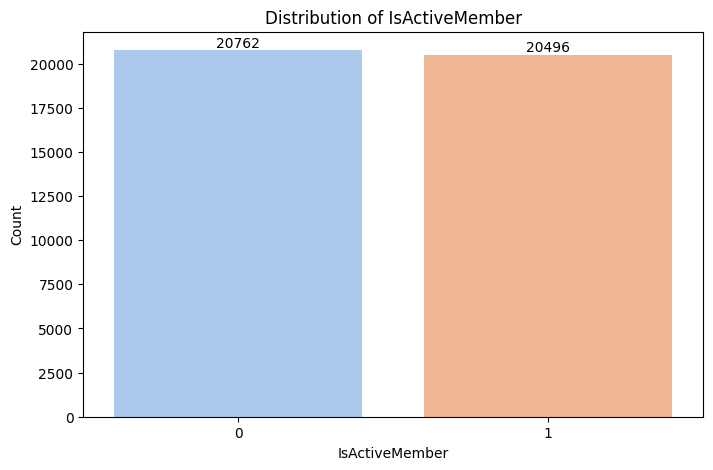

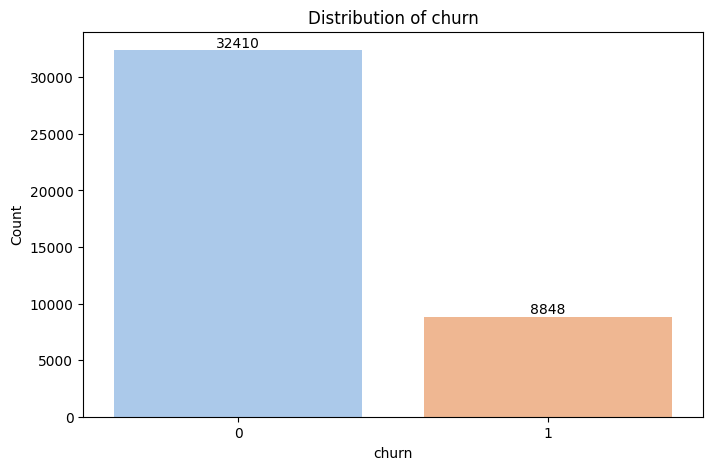

In [886]:
import warnings
warnings.simplefilter('ignore')

# Plot bar plots for all categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=column, palette="pastel")

    #Add count above bar
    for p in ax.patches:
        ax.annotate(f'{int(round(p.get_height()))}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Dalam count plot diatas dapat kita lihat bahwa:
- Terdapat banyak imbalanced class terutama pada variabel NumOfProducts, HasCrCard, Churn
- Untuk variabel lainnya pembagian class nya sudah cukup seimbang

## Univariate Analysis for Numerical

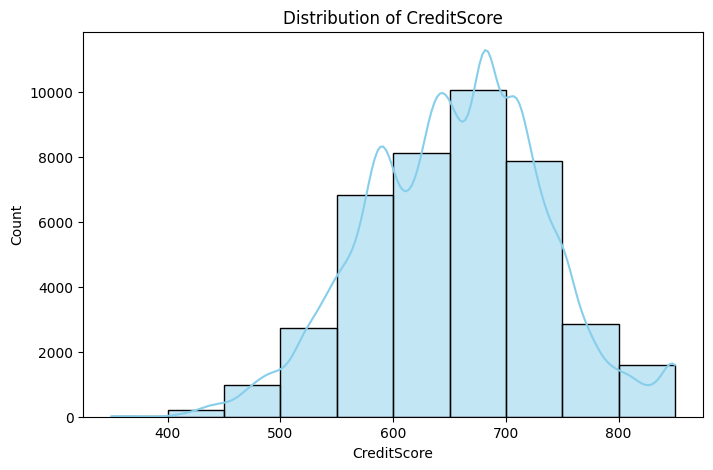

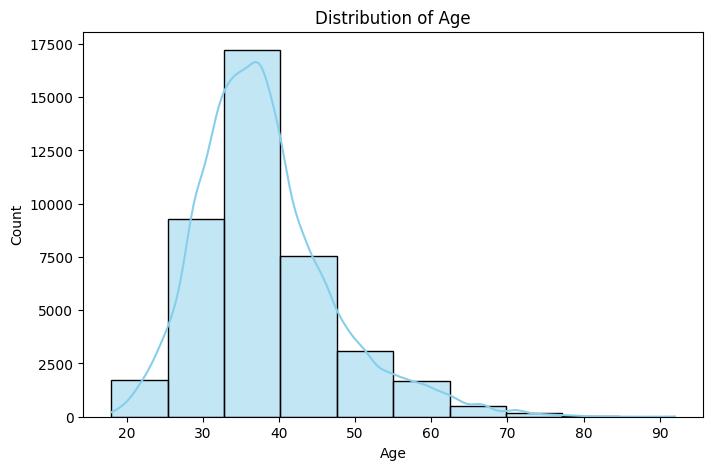

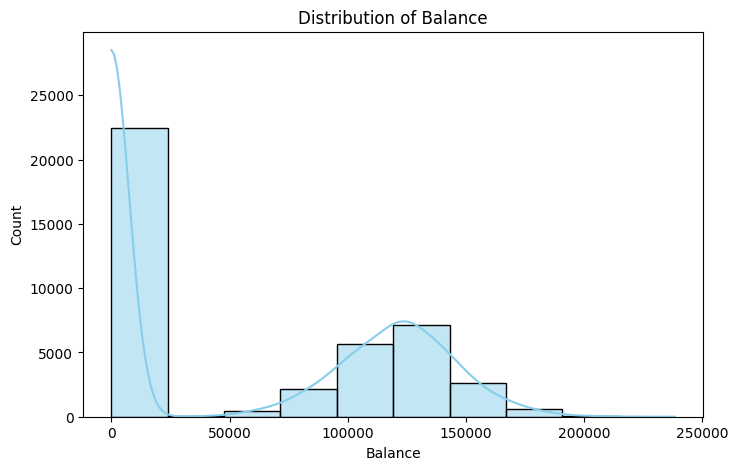

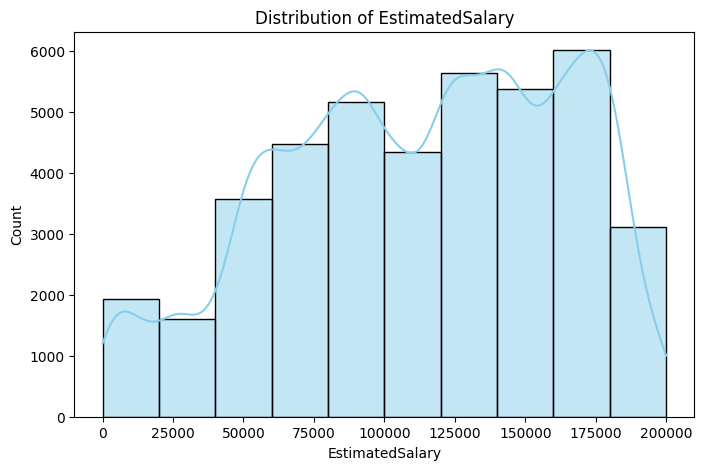

In [887]:
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, bins=10, kde=True,color="skyblue")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Dari histogram diatas dapat kita lihat:
- Ada banyak nilai 0 pada balanced (seperti yang telah kita dapatkan pada awal analisa)
- CreditScore berdistribusi normal
- Age mendekati left skewed distribution

## Bivariate analysis

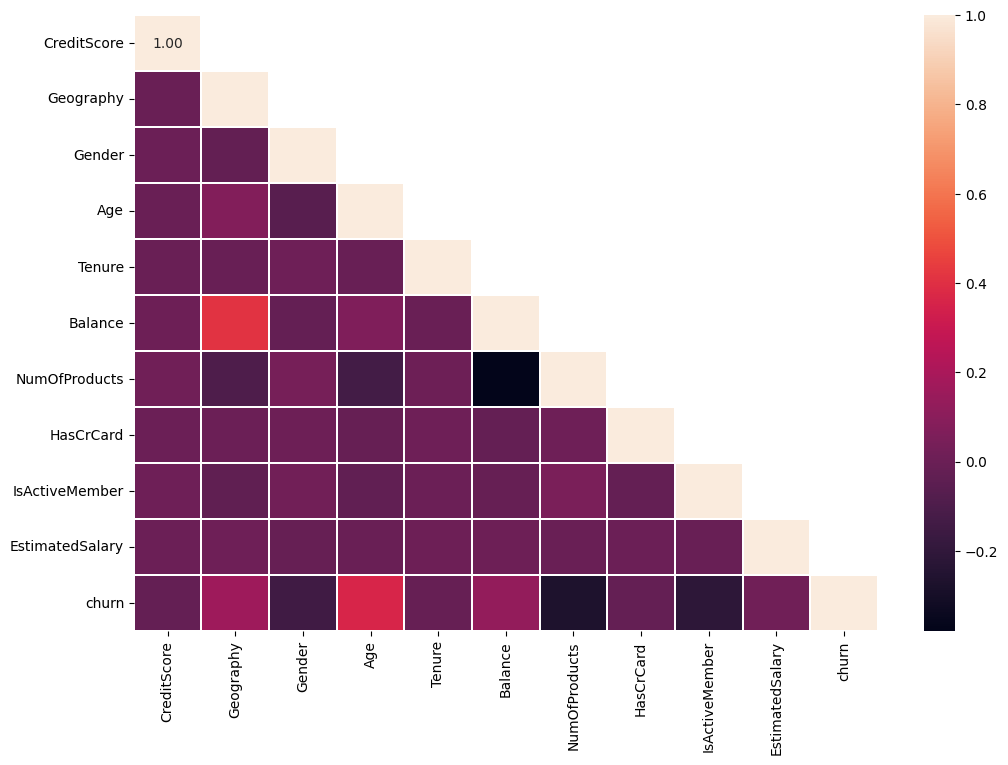

In [888]:
df_new = df.copy()
mapping = {"Geography":{"Spain":0,"France":2,"Germany":3}, "Gender":{"Female":0,"Male":1}}
df_new = df_new.replace(mapping)

# Calculation of the Spearman correlation
target = 'churn'
df_ordered = pd.concat([df_new.drop(target,axis=1), df_new[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linewidths=0.2)
plt.show()

Dari gambar diatas dapat kita lihat bahwa korelasi antar setiap variabel nya cukup rendah yang menunjukkan tidak ada multikolinearitas dan variabel berdiri secara independen

# d. Splitting data

In [889]:
input_df=df.drop('churn',axis=1)
output_df=df['churn']

from sklearn.model_selection import train_test_split

# Splitting into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=42)

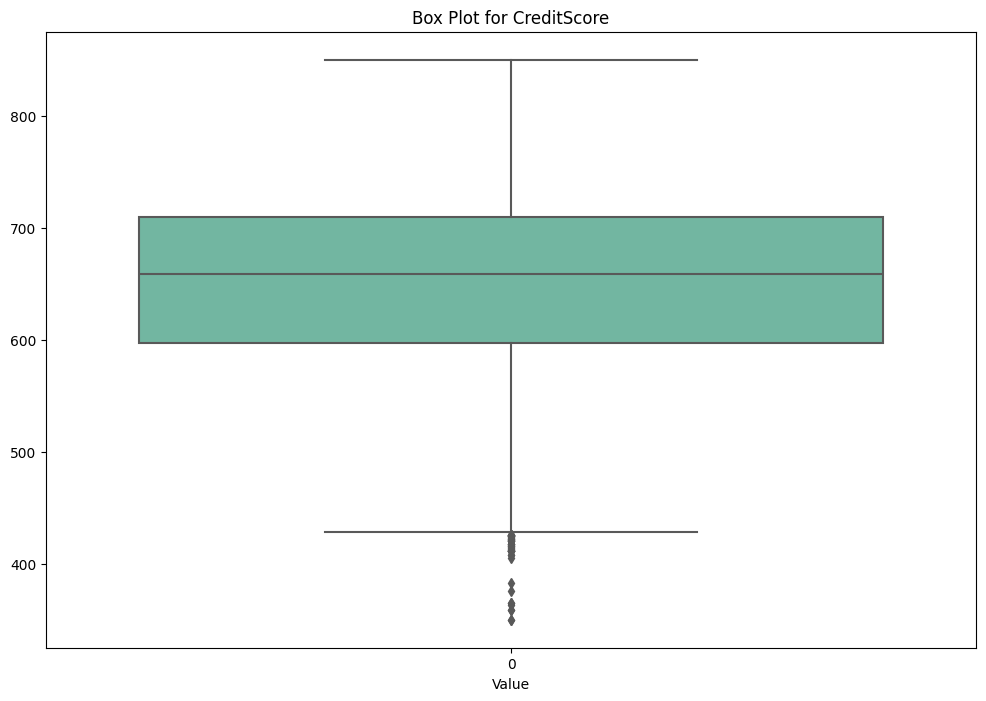

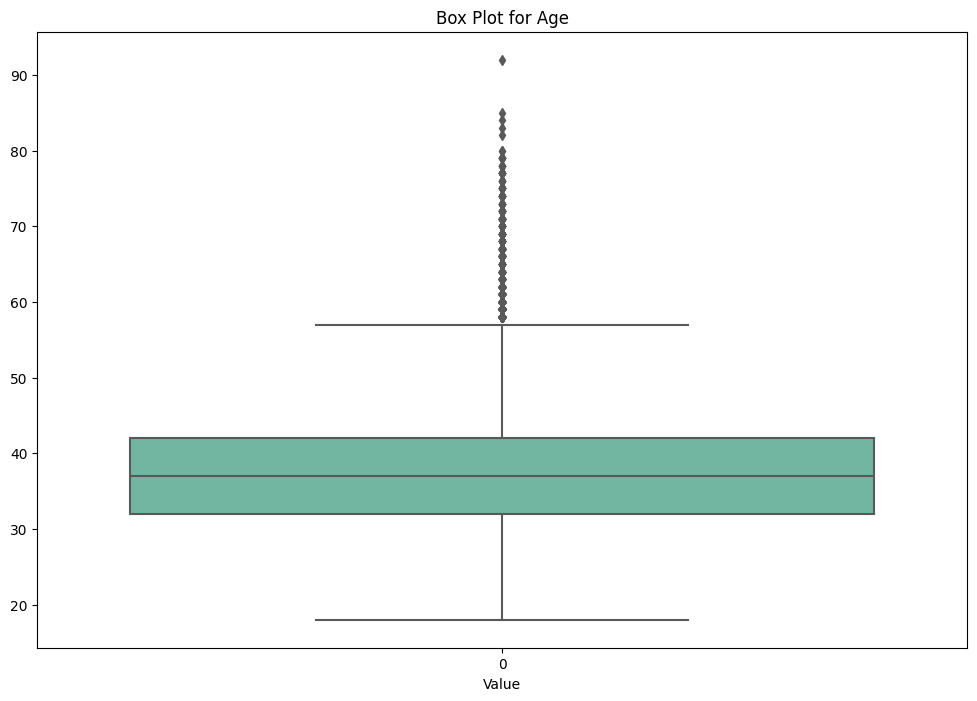

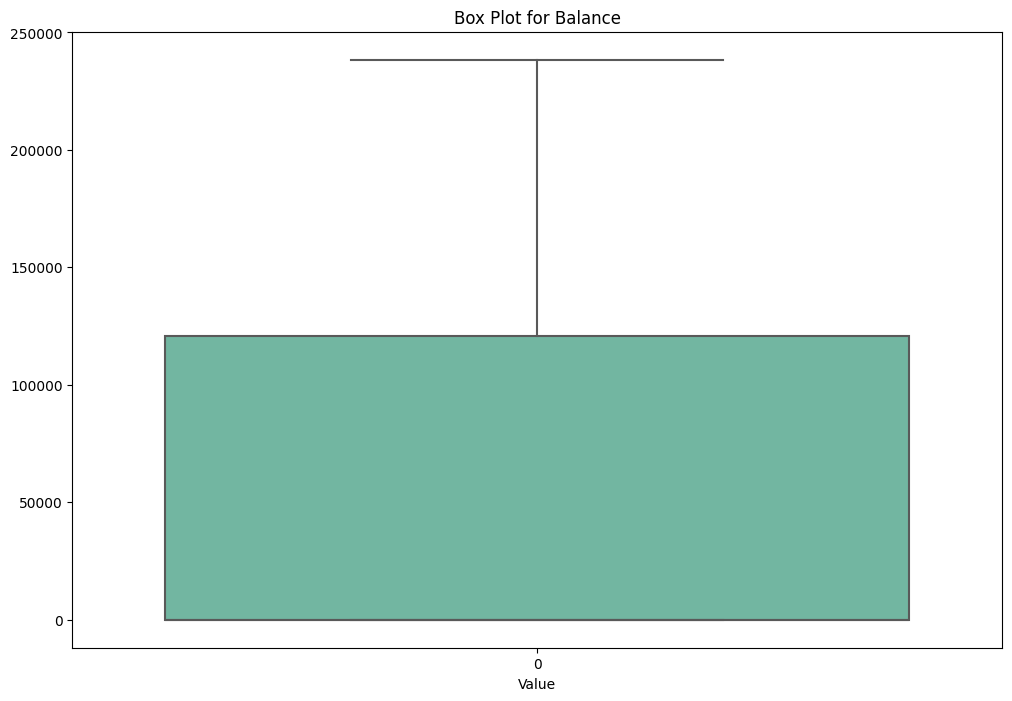

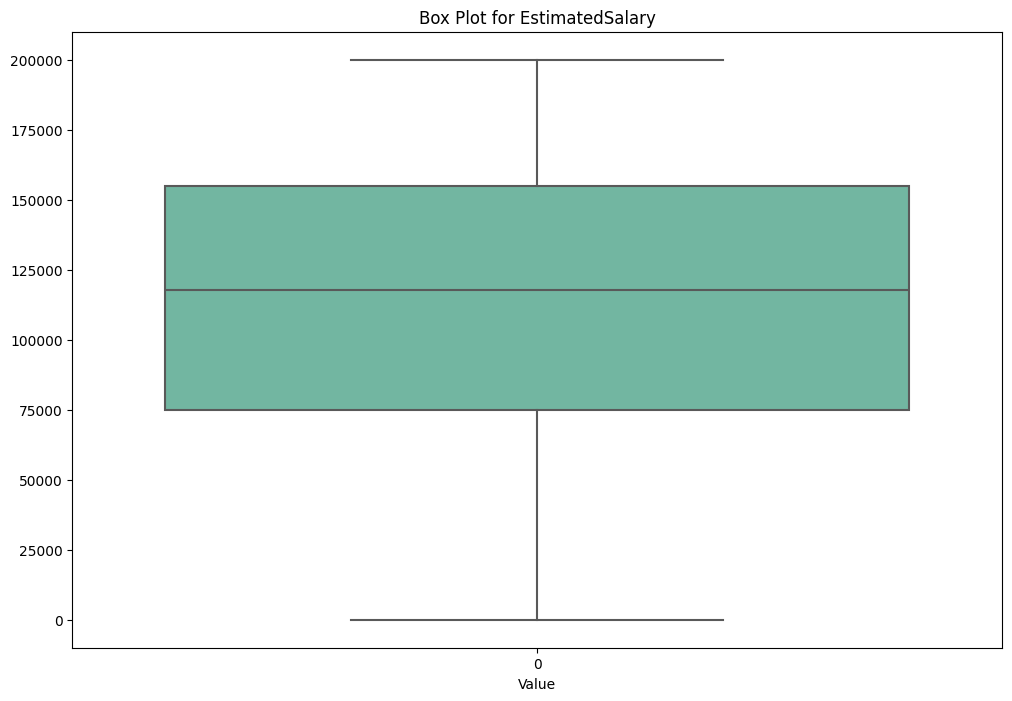

In [890]:
for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=x_train[column], palette='Set2')
    plt.title(f'Box Plot for {column}')
    plt.xlabel('Value')
    plt.show()

Dari boxplot diatas dapat kita lihat bahwa:
- Jumlah outlier pada CreditScore dan Age cukup banyak sehingga kita dapat scaling menggunakan Robust Scaler

Kita akan melakukan handle outliers pada bagian selanjutnya

# e. Feature engineering

## Encoding

In [891]:
mapping = {"Geography":{"Spain":0,"France":1,"Germany":2}, "Gender":{"Female":0,"Male":1}}
x_train = x_train.replace(mapping)
x_test= x_test.replace(mapping)

## Handle problem imbalanced class

Impute nilai 0 dari Balance dan balancing class pada imbalanced variable

In [892]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_train_resampled, y_train_resampled = os.fit_resample(x_train, y_train)

In [893]:
x_train_resampled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,725.000000,0,0,31.000000,2,0.000000,2,0,0,71830.100000
1,688.000000,0,1,36.000000,4,0.000000,1,1,0,129870.930000
2,748.000000,1,0,23.000000,7,118028.350000,1,0,1,41626.780000
3,701.000000,1,0,45.000000,5,0.000000,2,1,1,158948.630000
4,590.000000,1,0,23.000000,5,113923.810000,3,1,0,196789.900000
...,...,...,...,...,...,...,...,...,...,...
51953,751.234590,2,1,58.530317,3,152255.445058,1,0,0,173851.952674
51954,706.155159,1,1,49.512626,9,146078.219359,1,1,0,1541.746331
51955,644.057786,0,0,48.000000,2,0.000000,1,1,1,149744.871120
51956,586.961072,0,0,44.950542,4,0.000000,1,0,0,61324.840424


In [894]:
y_train_resampled.value_counts()

churn
0    25979
1    25979
Name: count, dtype: int64

As we can see class 1 and 0 in target variable is balanced and no longer bias

In [895]:
x_train = x_train_resampled.copy()
y_train = y_train_resampled.copy()

## Handle outliers

In [896]:
def outlier_count(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = len(data[(data[column] > upper_bound) | (data[column] < lower_bound)])
    return outliers


for i in numeric_columns:
    outlier = outlier_count(x_train, i)
    print(f"{i}: {outlier}")

CreditScore: 148
Age: 536
Balance: 0
EstimatedSalary: 0


In [897]:
x_train.shape

(51958, 10)

- Jumlah outlier pada Age cukup besar yaitu <b>536</b> data, jika kita menghapusnya itu akan menyebabkan kerugian karena kita kehilangan banyak data. Oleh karena itu, kita tetap dapat memakai data pada variable age, namun kita menggunakan metode lain untuk menangani outlier, seperti <b>Robust scaler</b> untuk menjadikan data kita lebih tahan terhadap outliers.

Namun, karena model yang menggunakan scaling tidak memiliki hasil yang akurat maka kita dapat menghapus saja outlier tersebut

Setelah dihapus lalu membuat model, hal tersebut dan menghasilkan model dengan akurasi yang lebih rendah. Maka, saya memutuskan untuk tetap memakai outlier tersebut dan memperbanyak data dengan <b>oversampling</b> sehingga model kita tidak terlalu terpengaruh dengan outliers

In [898]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only the rows within the bounds
    data_without_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_without_outliers

In [899]:
# Create a copy of the original DataFrame to preserve the original data
x_train_without_outliers = x_train.copy()

# Remove outliers for each numeric column
for i in numeric_columns:
    x_train_without_outliers = remove_outliers(x_train_without_outliers, i)

x_train_without_outliers.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Remove corresponding rows from labels (y_train)
y_train_without_outliers = y_train.iloc[x_train_without_outliers.index]

# Remove corresponding rows from labels (y_train)
y_train_without_outliers = y_train.iloc[x_train_without_outliers.index]

# Display the count of outliers for each numeric column
for i in numeric_columns:
    outlier = outlier_count(x_train, i)
    print(f"{i}: {outlier}")

# Display the shape of the DataFrame before and after removing outliers
print("Shape before removing outliers:", x_train.shape)
print("Shape after removing outliers:", x_train_without_outliers.shape)

CreditScore: 148
Age: 536
Balance: 0
EstimatedSalary: 0
Shape before removing outliers: (51958, 10)
Shape after removing outliers: (51276, 10)


In [900]:
# x_train = x_train_without_outliers.copy()
# y_train = y_train_without_outliers.copy()

In [901]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,725.000000,0,0,31.000000,2,0.000000,2,0,0,71830.100000
1,688.000000,0,1,36.000000,4,0.000000,1,1,0,129870.930000
2,748.000000,1,0,23.000000,7,118028.350000,1,0,1,41626.780000
3,701.000000,1,0,45.000000,5,0.000000,2,1,1,158948.630000
4,590.000000,1,0,23.000000,5,113923.810000,3,1,0,196789.900000
...,...,...,...,...,...,...,...,...,...,...
51953,751.234590,2,1,58.530317,3,152255.445058,1,0,0,173851.952674
51954,706.155159,1,1,49.512626,9,146078.219359,1,1,0,1541.746331
51955,644.057786,0,0,48.000000,2,0.000000,1,1,1,149744.871120
51956,586.961072,0,0,44.950542,4,0.000000,1,0,0,61324.840424


## Handle problem zero values in Balance variable

Depending on the nature of your data, you can apply transformations to the variable to reduce the impact of the zero values. For example, if the variable represents counts or frequencies, you can apply a logarithmic transformation to compress the scale and reduce the influence of extreme values.

In [902]:
x_train['Balance'] = np.log(np.array(x_train['Balance']) + 1)

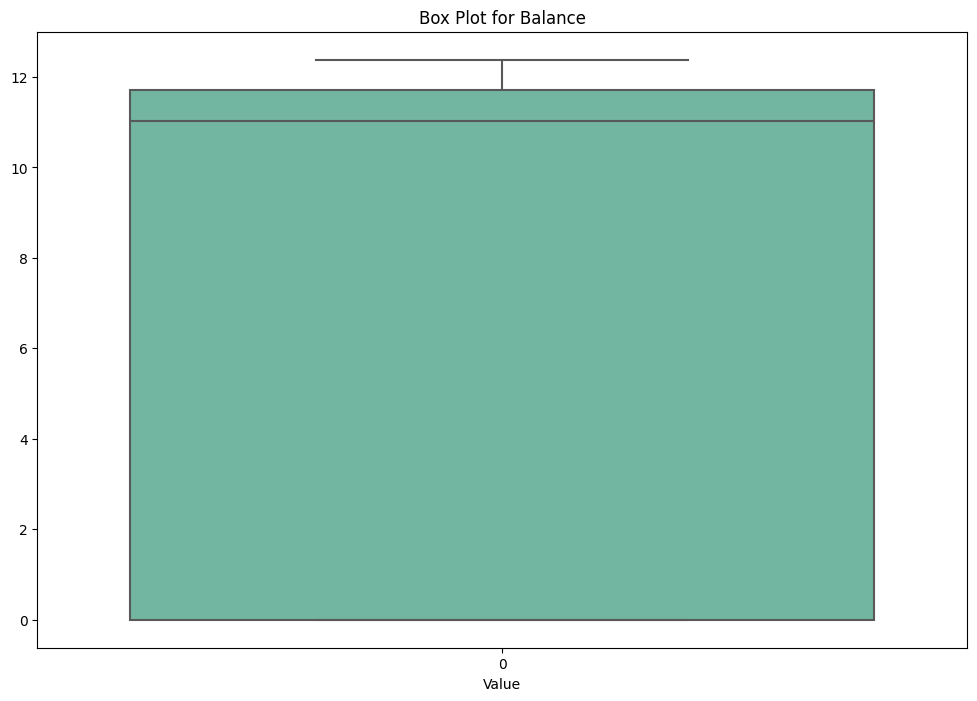

In [903]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=x_train['Balance'], palette='Set2')
plt.title(f'Box Plot for Balance')
plt.xlabel('Value')
plt.show()

Setelah melakukan perubahan pada nilai 0 dengan logaritmic transformation, kita dapat melihat bahwa boxplot Balance berkisar diantara 0-12

## Scaling

Sebelumnya saya telah melakukan scaling. Namun, akurasi dan metrics klasifikasi lainnya menjadi rendah dibandingkan dengan tidak di scaling, sehingga akan lebih bagus jika kita tidak menggunakan scaling

In [904]:
# scaler = StandardScaler()

# columns = ['Balance','EstimatedSalary','CreditScore','Age']

# x_train[columns] = scaler.fit_transform(x_train[columns])

In [905]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,725.000000,0,0,31.000000,2,0.000000,2,0,0,71830.100000
1,688.000000,0,1,36.000000,4,0.000000,1,1,0,129870.930000
2,748.000000,1,0,23.000000,7,11.678689,1,0,1,41626.780000
3,701.000000,1,0,45.000000,5,0.000000,2,1,1,158948.630000
4,590.000000,1,0,23.000000,5,11.643294,3,1,0,196789.900000
...,...,...,...,...,...,...,...,...,...,...
51953,751.234590,2,1,58.530317,3,11.933322,1,0,0,173851.952674
51954,706.155159,1,1,49.512626,9,11.891904,1,1,0,1541.746331
51955,644.057786,0,0,48.000000,2,0.000000,1,1,1,149744.871120
51956,586.961072,0,0,44.950542,4,0.000000,1,0,0,61324.840424


In [906]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
22930,787.0,1,1,36.0,6,170840.08,1,0,1,101371.72
4280,735.0,1,1,30.0,2,0.00,2,1,1,132908.07
40587,711.0,1,0,58.0,4,0.00,1,1,1,119110.03
31318,691.0,0,1,33.0,5,0.00,2,1,0,2010.98
34854,574.0,0,1,37.0,7,128061.00,1,1,0,62375.10
...,...,...,...,...,...,...,...,...,...,...
3493,587.0,2,1,49.0,2,117593.48,2,1,0,125307.87
17255,803.0,0,1,36.0,8,0.00,2,0,1,129975.34
24735,652.0,2,0,45.0,9,110827.49,1,1,1,153383.54
4036,754.0,1,1,66.0,9,0.00,2,1,1,137720.28


In [907]:
y_train

0        0
1        0
2        0
3        0
4        1
        ..
51953    1
51954    1
51955    1
51956    1
51957    1
Name: churn, Length: 51958, dtype: int64

# f. Model Selection

## Random Forest

In [908]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [909]:
y_predict=rf.predict(x_test)

In [910]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6431
           1       0.61      0.64      0.63      1821

    accuracy                           0.83      8252
   macro avg       0.76      0.76      0.76      8252
weighted avg       0.83      0.83      0.83      8252



In [911]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6431
           1       0.61      0.64      0.63      1821

    accuracy                           0.83      8252
   macro avg       0.76      0.76      0.76      8252
weighted avg       0.83      0.83      0.83      8252



## XGboost

In [912]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)

# Making predictions on the test set
y_predict = xgb.predict(x_test)

In [913]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict))


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6431
           1       0.62      0.63      0.63      1821

    accuracy                           0.83      8252
   macro avg       0.76      0.76      0.76      8252
weighted avg       0.84      0.83      0.84      8252



Dari kedua model diatas, XGBoost menghasilkan metrics yang lebih baik baik di class 0 maupun class 1, sehingga model yang akan kita gunakan adalah XGBoost

# g. Store best model in pickle file

In [914]:
import pickle

In [915]:
with open('xgb_model.pickle', 'wb') as f:
    pickle.dump(xgb, f)